In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import time as time
from IPython.display import HTML

In [2]:
%matplotlib inline

In [3]:
niter = int(1e4)

In [4]:
sarray = np.empty(shape=(niter, 5))

In [5]:
start_time = time.time()
for i in range(0, niter):
    sarray[i, 0] = time.time() - start_time
    sarray[i, 1] = np.random.rand()
    sarray[i, 2] = np.random.rand()  
    sarray[i, 3] = 1 if np.sqrt(sarray[i, 1] ** 2 + sarray[i, 2] ** 2) <= 1.0 else 0
    sarray[i, 4] = sarray[0:i, 3].sum() / (i + 1) * 4
    if i % 2000 == 0:
        print('Iteration: {0}'.format(i+1))
        print('Approximate value of pi: {0}'.format(sarray[i, 4]))

Iteration: 1
Approximate value of pi: 0.0
Iteration: 2001
Approximate value of pi: 3.100449775112444
Iteration: 4001
Approximate value of pi: 3.1512121969507625
Iteration: 6001
Approximate value of pi: 3.1301449758373603
Iteration: 8001
Approximate value of pi: 3.118610173728284


In [6]:
scolor = np.array(['r' if v == 1 else 'b' for v in sarray[:, 3]])

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes()
ax.xaxis.set_animated(True)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ttl = ax.text(.5, 1.005, '', transform = ax.transAxes)
scat = ax.scatter([], [], c=[])

In [8]:
def update(num):
    points = sarray[:num, 1:3]
    colors = scolor[:num]
    scat.set_offsets(points)
    scat.set_color(colors)
    
    ttl.set_text("Iteration: {0}".format(num) + 
                 ", Time: {0:.2f}".format(sarray[num, 0]) + 
                 ", Pi = {0:.4f}".format(sarray[num, 4]))
    return scat, ttl

In [9]:
animate = animation.FuncAnimation(fig, update, frames=range(len(sarray))[::100], interval=100, blit=True)

In [10]:
HTML(animate.to_html5_video())

In [11]:
animate.save("t.mp4")

In [12]:
animate.save('t.gif', writer='imagemagick')

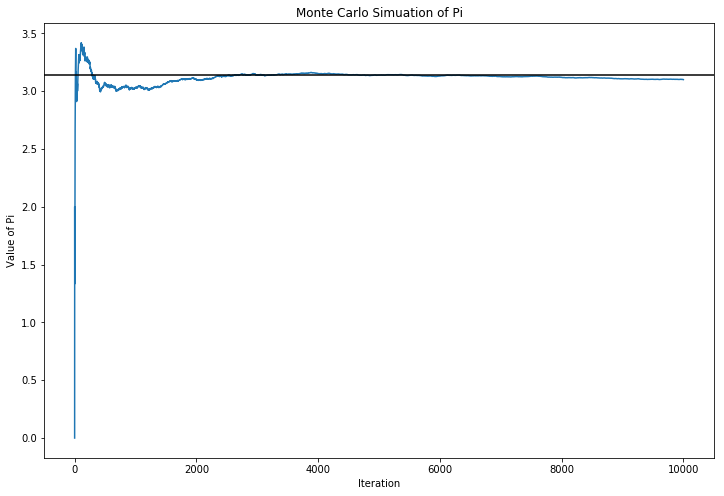

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(sarray[:, 4])
plt.axhline(y=np.pi, color='k')
plt.xlabel('Iteration')
plt.ylabel('Value of Pi')
plt.title('Monte Carlo Simuation of Pi')